In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')



In [2]:
ds=pd.read_csv('titanic.csv')
ds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
ds.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Explotary Data Analysis

In [5]:
ds.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
ds.shape

(891, 12)

In [7]:
ds=pd.DataFrame(data=ds)
ds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
ds.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ds['Sex']=le.fit_transform(ds['Sex'])
ds['Embarked'] = le.fit_transform(ds['Embarked'].astype(str))
ds['Ticket']=le.fit_transform(ds['Ticket'])
ds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,669,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,472,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,101,13.0000,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,14,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,675,23.4500,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,8,30.0000,C148,0


In [10]:
ds.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

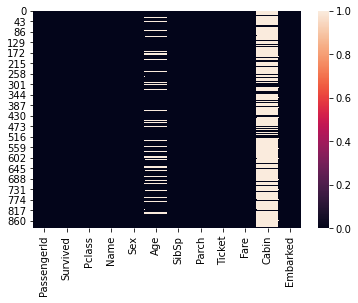

In [11]:
sns.heatmap(ds.isnull())

PassengerId       AxesSubplot(0.125,0.657941;0.133621x0.222059)
Survived       AxesSubplot(0.285345,0.657941;0.133621x0.222059)
Pclass          AxesSubplot(0.44569,0.657941;0.133621x0.222059)
Sex            AxesSubplot(0.606034,0.657941;0.133621x0.222059)
Age            AxesSubplot(0.766379,0.657941;0.133621x0.222059)
SibSp             AxesSubplot(0.125,0.391471;0.133621x0.222059)
Parch          AxesSubplot(0.285345,0.391471;0.133621x0.222059)
Ticket          AxesSubplot(0.44569,0.391471;0.133621x0.222059)
Fare           AxesSubplot(0.606034,0.391471;0.133621x0.222059)
Embarked       AxesSubplot(0.766379,0.391471;0.133621x0.222059)
dtype: object

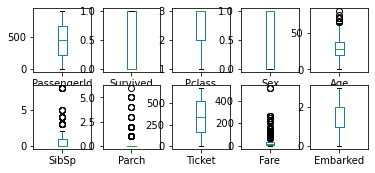

In [12]:
ds.plot(kind='box',subplots=True,layout=(3,5))

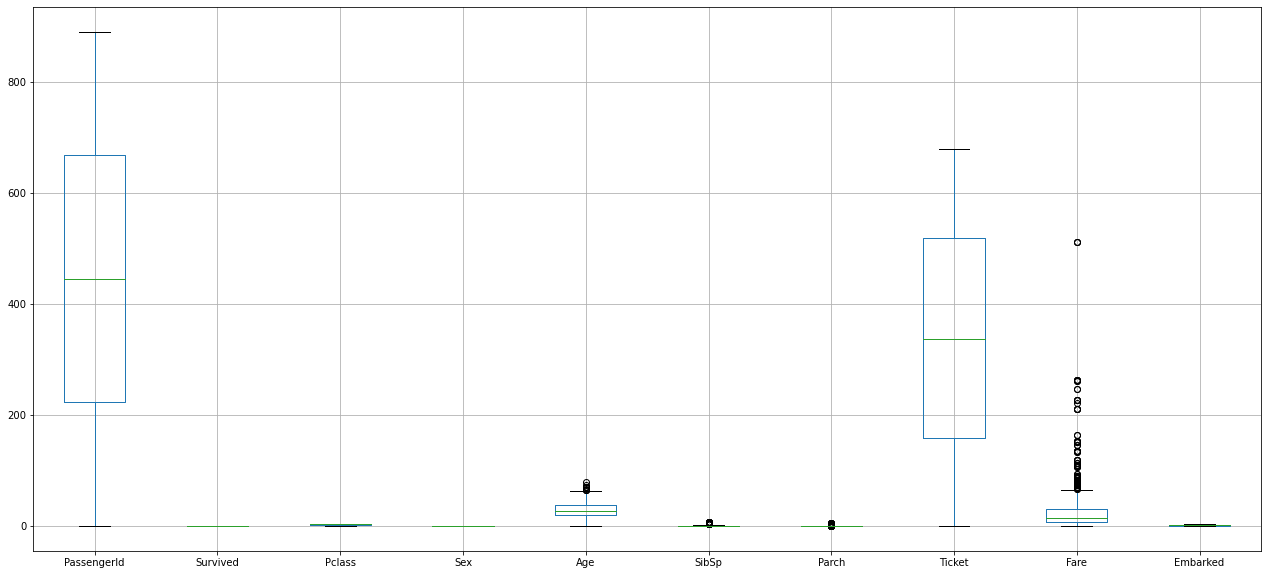

In [13]:
ds.boxplot(figsize=(22,10))

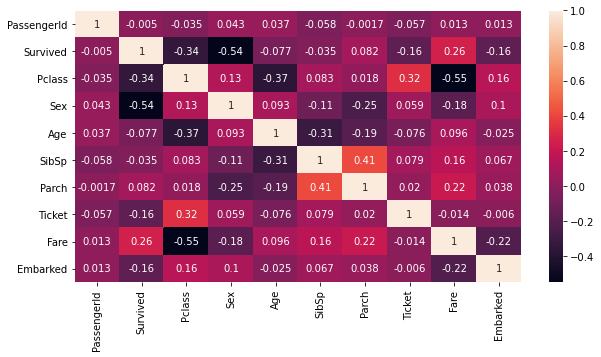

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(ds.corr(),annot=True)

In [15]:
ds.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.389108
SibSp          3.695352
Parch          2.749117
Ticket         0.000246
Fare           4.787317
Embarked      -1.246689
dtype: float64

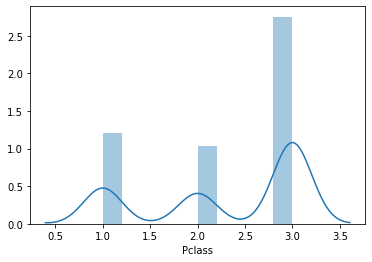

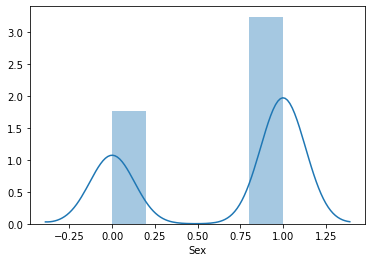

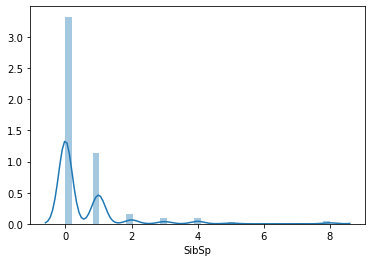

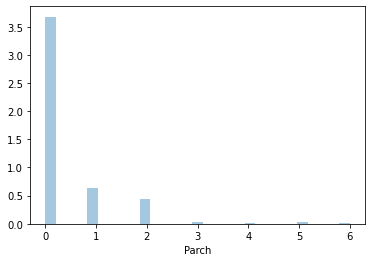

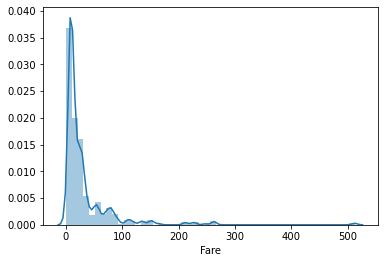

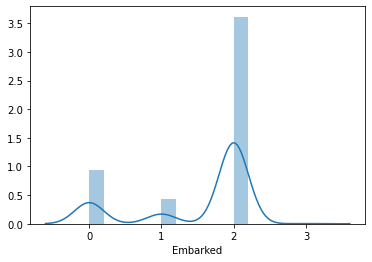

In [16]:
columns=['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare','Embarked']    
for c in columns:
    if ds[c].skew()>0.5 or ds[c].skew()<-0.5:
#         print(c,ds[c].skew())
        sns.distplot(ds[c])
        plt.show()
        

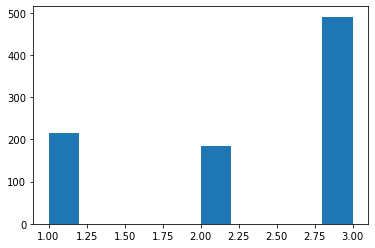

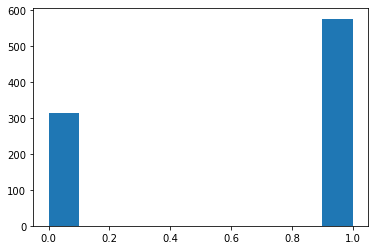

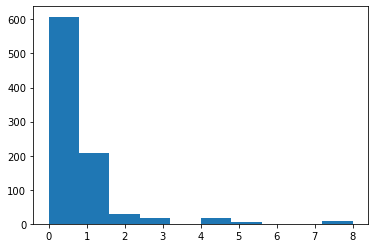

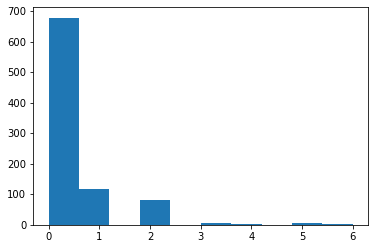

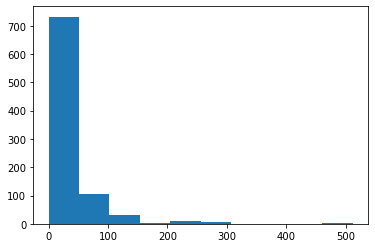

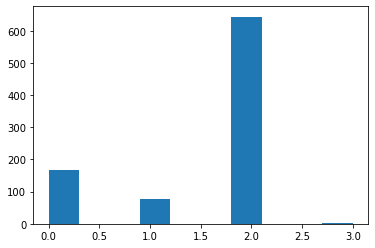

In [17]:
columns=['Pclass','Sex','SibSp',
       'Parch','Fare','Embarked']    
for c in columns:
    plt.hist(ds[c])
    plt.show()  

# Data Cleaning

In [18]:
df=ds.drop(['Cabin'],axis=1,inplace=True)
df

In [19]:
dfs=ds.replace(np.NaN,0)
dfs

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,669,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,101,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,14,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,0.0,1,2,675,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,8,30.0000,0


In [20]:
dfs.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
dfs.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,23.799293,0.523008,0.381594,338.528620,32.204208,1.538721
std,257.353842,0.486592,0.836071,0.477990,17.596074,1.102743,0.806057,200.850657,49.693429,0.794231
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,6.000000,0.000000,0.000000,158.500000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,337.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,3.000000


In [22]:
dfs.drop(['Name'],axis=1,inplace=True)

In [23]:
dfs

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,22.0,1,0,523,7.2500,2
1,2,1,1,0,38.0,1,0,596,71.2833,0
2,3,1,3,0,26.0,0,0,669,7.9250,2
3,4,1,1,0,35.0,1,0,49,53.1000,2
4,5,0,3,1,35.0,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,101,13.0000,2
887,888,1,1,0,19.0,0,0,14,30.0000,2
888,889,0,3,0,0.0,1,2,675,23.4500,2
889,890,1,1,1,26.0,0,0,8,30.0000,0


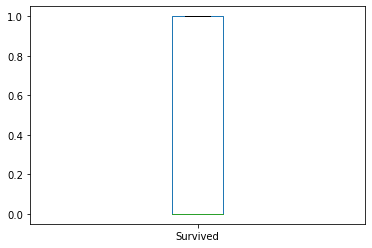

In [24]:
dfs['Survived'].plot.box()

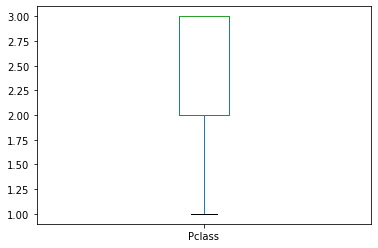

In [25]:
dfs['Pclass'].plot.box()

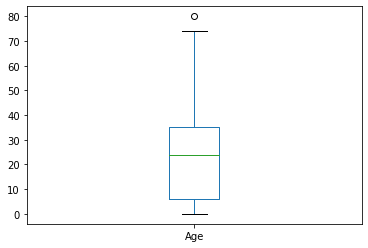

In [26]:
dfs['Age'].plot.box()

PassengerId       AxesSubplot(0.125,0.657941;0.110714x0.222059)
Survived       AxesSubplot(0.257857,0.657941;0.110714x0.222059)
Pclass         AxesSubplot(0.390714,0.657941;0.110714x0.222059)
Sex            AxesSubplot(0.523571,0.657941;0.110714x0.222059)
Age            AxesSubplot(0.656429,0.657941;0.110714x0.222059)
SibSp          AxesSubplot(0.789286,0.657941;0.110714x0.222059)
Parch             AxesSubplot(0.125,0.391471;0.110714x0.222059)
Ticket         AxesSubplot(0.257857,0.391471;0.110714x0.222059)
Fare           AxesSubplot(0.390714,0.391471;0.110714x0.222059)
Embarked       AxesSubplot(0.523571,0.391471;0.110714x0.222059)
dtype: object

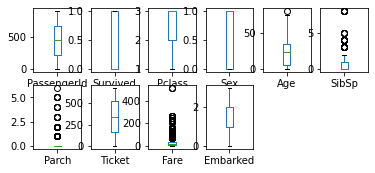

In [27]:
dfs.plot(kind='box',subplots=True, layout=(3,6))

In [28]:
dfs.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,23.799293,0.523008,0.381594,338.528620,32.204208,1.538721
std,257.353842,0.486592,0.836071,0.477990,17.596074,1.102743,0.806057,200.850657,49.693429,0.794231
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,6.000000,0.000000,0.000000,158.500000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,337.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,3.000000


In [29]:
dfs.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.262862
SibSp          3.695352
Parch          2.749117
Ticket         0.000246
Fare           4.787317
Embarked      -1.246689
dtype: float64

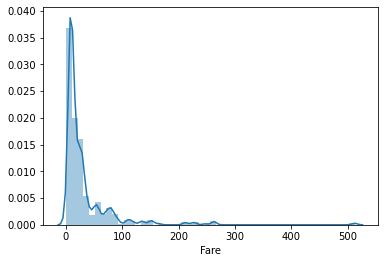

In [30]:
sns.distplot(dfs['Fare'])

In [31]:
from scipy.stats import zscore
z=np.abs(zscore(dfs))
z

array([[1.73010796, 0.78927234, 0.82737724, ..., 0.91896631, 0.50244517,
        0.58111394],
       [1.72622007, 1.2669898 , 1.56610693, ..., 1.28262456, 0.78684529,
        1.93846038],
       [1.72233219, 1.2669898 , 0.82737724, ..., 1.64628282, 0.48885426,
        0.58111394],
       ...,
       [1.72233219, 0.78927234, 0.82737724, ..., 1.67617254, 0.17626324,
        0.58111394],
       [1.72622007, 1.2669898 , 1.56610693, ..., 1.64656796, 0.04438104,
        1.93846038],
       [1.73010796, 0.78927234, 0.82737724, ..., 0.63501397, 0.49237783,
        0.67867322]])

In [32]:
threshold=3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88, 118, 119, 159,
       164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278, 299, 311,
       324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 527, 541, 542,
       557, 567, 610, 630, 638, 678, 679, 683, 686, 689, 700, 716, 730,
       736, 737, 742, 774, 779, 787, 792, 813, 824, 846, 850, 858, 863,
       885], dtype=int64), array([6, 5, 6, 8, 5, 5, 5, 5, 6, 8, 8, 5, 5, 5, 6, 5, 5, 5, 5, 5, 8, 5,
       5, 5, 8, 8, 5, 8, 6, 8, 8, 5, 6, 6, 8, 5, 8, 5, 5, 8, 6, 6, 4, 6,
       6, 8, 5, 5, 8, 8, 8, 8, 6, 8, 8, 6, 8, 5, 5, 5, 5, 5, 5, 6, 5, 6],
      dtype=int64))


In [33]:
z[25][6]

5.73284383018578

In [34]:
df_n=dfs[(z<3).all(axis=1)]

In [35]:
dfs.shape   

(891, 10)

In [36]:
df_n.shape

(826, 10)

In [37]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 826 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  826 non-null    int64  
 1   Survived     826 non-null    int64  
 2   Pclass       826 non-null    int64  
 3   Sex          826 non-null    int32  
 4   Age          826 non-null    float64
 5   SibSp        826 non-null    int64  
 6   Parch        826 non-null    int64  
 7   Ticket       826 non-null    int32  
 8   Fare         826 non-null    float64
 9   Embarked     826 non-null    int32  
dtypes: float64(2), int32(3), int64(5)
memory usage: 61.3 KB


In [38]:
cr=df_n.corr()
cr

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,1.000000,-0.014899,-0.027502,0.066741,0.027309,-0.050287,0.007721,-0.064766,-0.003988,0.025228
Survived,-0.014899,1.000000,-0.316462,-0.556736,-0.021162,0.095789,0.201172,-0.164100,0.328023,-0.146650
Pclass,-0.027502,-0.316462,1.000000,0.134015,-0.357129,-0.052686,-0.079316,0.340017,-0.692235,0.121491
Sex,0.066741,-0.556736,0.134015,1.000000,0.046525,-0.200040,-0.251791,0.068764,-0.242793,0.108705
Age,0.027309,-0.021162,-0.357129,0.046525,1.000000,-0.059623,-0.092006,-0.057057,0.201220,0.107963
SibSp,-0.050287,0.095789,-0.052686,-0.200040,-0.059623,1.000000,0.309422,-0.006370,0.248584,-0.012275
Parch,0.007721,0.201172,-0.079316,-0.251791,-0.092006,0.309422,1.000000,-0.025166,0.261613,-0.014597
Ticket,-0.064766,-0.164100,0.340017,0.068764,-0.057057,-0.006370,-0.025166,1.000000,-0.145593,0.020401
Fare,-0.003988,0.328023,-0.692235,-0.242793,0.201220,0.248584,0.261613,-0.145593,1.000000,-0.186558
Embarked,0.025228,-0.146650,0.121491,0.108705,0.107963,-0.012275,-0.014597,0.020401,-0.186558,1.000000


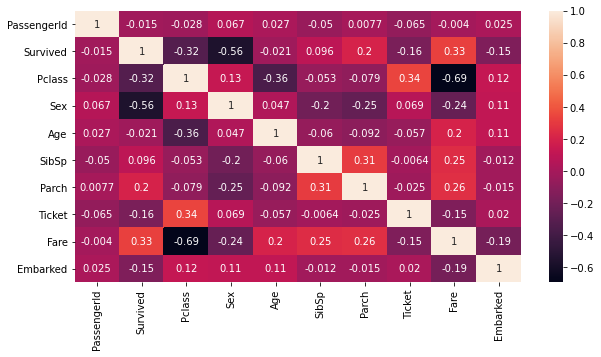

In [39]:
crh=df_n.corr()
plt.figure(figsize=(10,5))
sns.heatmap(crh,annot=True)
plt.show()

In [40]:
target=df_n['Survived'] 

In [41]:
X=df_n.drop('Survived',axis=1)

In [42]:
X.shape

(826, 9)

In [43]:
target.shape

(826,)

In [44]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,target,test_size=.30,random_state=42)

In [45]:
train_x.shape

(578, 9)

In [46]:
test_x.shape

(248, 9)

In [47]:
train_y.shape

(578,)

In [48]:
test_y.shape

(248,)

# Model Generation

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
lg=LogisticRegression()

In [50]:
lg.fit(train_x,train_y)

LogisticRegression()

In [51]:
pred=lg.predict(test_x)
pred

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1], dtype=int64)

In [52]:
print("accuracy_score:",accuracy_score(test_y,pred))

accuracy_score: 0.8266129032258065


In [53]:
print(confusion_matrix(test_y,pred))


[[137  25]
 [ 18  68]]


In [54]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       162
           1       0.73      0.79      0.76        86

    accuracy                           0.83       248
   macro avg       0.81      0.82      0.81       248
weighted avg       0.83      0.83      0.83       248



In [55]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(train_x,train_y)
pred=dt.predict(test_x)
print(accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

0.75
[[129  33]
 [ 29  57]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       162
           1       0.63      0.66      0.65        86

    accuracy                           0.75       248
   macro avg       0.72      0.73      0.73       248
weighted avg       0.75      0.75      0.75       248



In [56]:
from sklearn.ensemble import RandomForestClassifier
rd=RandomForestClassifier()
rd.fit(train_x,train_y)
pred=rd.predict(test_x)
print(accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

0.8266129032258065
[[138  24]
 [ 19  67]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       162
           1       0.74      0.78      0.76        86

    accuracy                           0.83       248
   macro avg       0.81      0.82      0.81       248
weighted avg       0.83      0.83      0.83       248



In [57]:
from sklearn.svm import SVC
sv=SVC(kernel='linear')
sv.fit(train_x,train_y)
pred=sv.predict(test_x)
print(accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))


0.8225806451612904
[[138  24]
 [ 20  66]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       162
           1       0.73      0.77      0.75        86

    accuracy                           0.82       248
   macro avg       0.80      0.81      0.81       248
weighted avg       0.82      0.82      0.82       248



In [58]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(train_x,train_y)
pred=ad.predict(test_x)
print(accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))


0.8104838709677419
[[134  28]
 [ 19  67]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       162
           1       0.71      0.78      0.74        86

    accuracy                           0.81       248
   macro avg       0.79      0.80      0.80       248
weighted avg       0.82      0.81      0.81       248



In [59]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(train_x,train_y)
pred=kn.predict(test_x)
print(accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

0.625
[[119  43]
 [ 50  36]]
              precision    recall  f1-score   support

           0       0.70      0.73      0.72       162
           1       0.46      0.42      0.44        86

    accuracy                           0.62       248
   macro avg       0.58      0.58      0.58       248
weighted avg       0.62      0.62      0.62       248



# Hyper Parameter Tuning

In [61]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters={'kernel':['linear','rbf'],'C':[1,10]}
svmg=svm.SVC()
hp=GridSearchCV(svmg,parameters)
hp.fit(train_x,train_y)
hp

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ['linear', 'rbf']})

In [62]:
print(hp.best_params_)

{'C': 10, 'kernel': 'linear'}


In [80]:
svmg=svm.SVC(kernel='linear',C=10)
svmg.fit(train_x,train_y)
s=svmg.score(train_x,train_y)
print(s)

0.7975778546712803


In [64]:
dtcg=DecisionTreeClassifier()

grid_param={ 'criterion':['gini','entropy']}

#gridk={'kernel':['linear','rbf','poly']}

gd_sr=GridSearchCV(estimator=dtcg,
                  param_grid=grid_param,
                  scoring='accuracy',
                  cv=5)

gd_sr.fit(train_x,train_y)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_re=gd_sr.best_score_
print(best_re)

{'criterion': 'gini'}
0.7562218890554723


In [ ]:
DecisionTreeClassifiergives 75% accuracy

In [65]:
dtcg=DecisionTreeClassifier(criterion='gini')
dtcg.fit(train_x,train_y)
dtcg.score(train_x,train_y)

1.0

In [66]:
rdg=RandomForestClassifier()
grid_param={ 'criterion':['gini','entropy']}

#gridk={'kernel':['linear','rbf','poly']}

gd_sr=GridSearchCV(estimator=rdg,
                  param_grid=grid_param,
                  scoring='accuracy',
                  cv=5)

gd_sr.fit(train_x,train_y)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_re=gd_sr.best_score_
print(best_re)


{'criterion': 'gini'}
0.7958470764617692


In [67]:
rdg=RandomForestClassifier(criterion='gini')
rdg.fit(train_x,train_y)
rdg.score(train_x,train_y)


1.0

# ROC AUC Curve

In [68]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [69]:
y_pred_prob=rd.predict_proba(test_x)[:,1]
y_pred_prob

array([0.04, 0.44, 0.06, 0.83, 0.5 , 0.27, 0.05, 0.08, 0.11, 0.07, 0.54,
       0.62, 0.81, 0.26, 0.96, 0.99, 0.86, 0.27, 0.01, 0.59, 0.09, 0.99,
       0.03, 0.65, 0.2 , 0.97, 0.64, 0.11, 0.18, 0.19, 0.38, 0.17, 0.28,
       0.38, 0.21, 0.04, 0.39, 0.11, 0.42, 0.85, 0.49, 0.15, 0.11, 0.13,
       0.77, 0.2 , 0.65, 0.34, 0.23, 0.86, 0.34, 0.91, 0.15, 0.12, 0.04,
       0.39, 0.19, 0.12, 0.6 , 0.09, 0.89, 0.01, 0.47, 0.17, 0.22, 0.15,
       0.16, 0.2 , 0.39, 0.36, 0.62, 0.42, 0.27, 0.98, 0.03, 0.18, 0.07,
       0.4 , 0.  , 0.98, 0.84, 0.31, 0.67, 0.14, 0.23, 0.01, 0.38, 0.25,
       0.06, 0.01, 0.82, 0.95, 0.81, 0.71, 0.96, 0.96, 0.16, 0.21, 0.96,
       0.02, 0.11, 0.96, 0.31, 0.36, 0.92, 0.69, 0.96, 0.86, 0.05, 0.89,
       0.84, 0.53, 0.98, 0.69, 0.08, 0.04, 0.38, 0.74, 0.18, 0.5 , 0.  ,
       0.36, 0.97, 0.78, 0.12, 0.31, 0.93, 0.01, 0.19, 0.95, 0.89, 0.26,
       0.77, 0.61, 0.98, 0.98, 0.02, 0.05, 0.02, 0.1 , 0.59, 0.07, 0.09,
       0.11, 0.76, 0.11, 0.07, 0.93, 0.01, 0.33, 0.

In [70]:
fpr,tpr,thresholds=roc_curve(test_y,y_pred_prob)

In [71]:
fpr

array([0.        , 0.        , 0.00617284, 0.00617284, 0.00617284,
       0.00617284, 0.01234568, 0.01851852, 0.01851852, 0.01851852,
       0.01851852, 0.01851852, 0.01851852, 0.01851852, 0.01851852,
       0.01851852, 0.01851852, 0.02469136, 0.02469136, 0.03703704,
       0.03703704, 0.03703704, 0.04938272, 0.04938272, 0.05555556,
       0.05555556, 0.0617284 , 0.06790123, 0.08024691, 0.09259259,
       0.09876543, 0.12345679, 0.12345679, 0.12962963, 0.14197531,
       0.14814815, 0.14814815, 0.17283951, 0.17283951, 0.17901235,
       0.19135802, 0.2037037 , 0.21604938, 0.22222222, 0.2345679 ,
       0.25308642, 0.2654321 , 0.2962963 , 0.32098765, 0.33950617,
       0.35802469, 0.37654321, 0.39506173, 0.40123457, 0.40740741,
       0.42592593, 0.43209877, 0.4382716 , 0.46296296, 0.48148148,
       0.52469136, 0.53703704, 0.54938272, 0.58641975, 0.60493827,
       0.61728395, 0.69135802, 0.69753086, 0.71604938, 0.74074074,
       0.79012346, 0.82098765, 0.83950617, 0.89506173, 0.91358

In [72]:
tpr

array([0.        , 0.02325581, 0.09302326, 0.13953488, 0.20930233,
       0.23255814, 0.25581395, 0.26744186, 0.29069767, 0.30232558,
       0.36046512, 0.38372093, 0.45348837, 0.47674419, 0.48837209,
       0.53488372, 0.54651163, 0.56976744, 0.59302326, 0.59302326,
       0.60465116, 0.62790698, 0.62790698, 0.63953488, 0.63953488,
       0.6744186 , 0.6744186 , 0.70930233, 0.72093023, 0.74418605,
       0.76744186, 0.76744186, 0.77906977, 0.77906977, 0.77906977,
       0.77906977, 0.80232558, 0.80232558, 0.81395349, 0.81395349,
       0.8372093 , 0.8372093 , 0.84883721, 0.86046512, 0.87209302,
       0.88372093, 0.88372093, 0.88372093, 0.88372093, 0.88372093,
       0.88372093, 0.88372093, 0.89534884, 0.89534884, 0.90697674,
       0.91860465, 0.91860465, 0.93023256, 0.94186047, 0.94186047,
       0.94186047, 0.94186047, 0.95348837, 0.95348837, 0.95348837,
       0.95348837, 0.97674419, 0.97674419, 0.97674419, 0.98837209,
       0.98837209, 0.98837209, 1.        , 1.        , 1.     

In [73]:
thresholds

array([1.99, 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.89,
       0.87, 0.85, 0.84, 0.83, 0.81, 0.78, 0.77, 0.76, 0.73, 0.72, 0.71,
       0.69, 0.68, 0.67, 0.65, 0.64, 0.62, 0.61, 0.6 , 0.59, 0.56, 0.55,
       0.54, 0.53, 0.51, 0.5 , 0.48, 0.47, 0.46, 0.44, 0.43, 0.42, 0.4 ,
       0.39, 0.38, 0.37, 0.36, 0.33, 0.31, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01,
       0.  ])

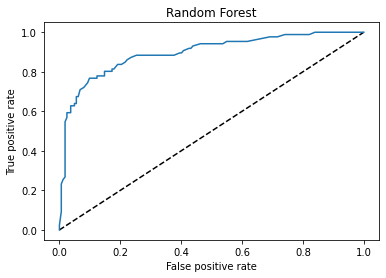

In [74]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest')
plt.show()

In [75]:
auc_score=roc_auc_score(test_y,lg.predict(test_x))
auc_score

0.8181883433821419

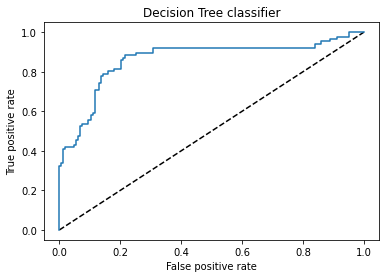

0.8181883433821419

In [76]:
y_pred_prob=lg.predict_proba(test_x)[:,1]
fpr,tpr,thresholds=roc_curve(test_y,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree classifier')
plt.show()
auc_score=roc_auc_score(test_y,lg.predict(test_x))
auc_score

# Cross Validation 

In [77]:
from sklearn.model_selection import cross_val_score
lgscores=cross_val_score(lg,X,target,cv=5,scoring='accuracy')
print(lgscores.mean())


0.7809127418765973


In [78]:
from sklearn.model_selection import cross_val_score
rdscores=cross_val_score(rd,X,target,cv=5,scoring='accuracy')
print(rdscores.mean())


0.8087915297553853


In [79]:
from sklearn.model_selection import cross_val_score
svcscores=cross_val_score(sv,X,target,cv=5,scoring='accuracy')
print(svcscores.mean())


0.7941730558598028


In [ ]:
The Best Model For this dataset is RandomForestClassifier 80% accuracy

In [81]:
import joblib
joblib.dump(rd,'titanic.obj')

['titanic.obj']

In [83]:
titanicfile=joblib.load('titanic.obj')
titanicfile.predict(train_x)

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,